<center><font color=#555555><font size=6> MAF1731B - Microestructuras y Sistemas de Trading </font> <br> <br>
    
<center><font color=#555555><font size=5> Ingenieria Financiera </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> Luis Antonio Barriga Adame

Jorge Alberto Hernandez Hernandez

Pablo Humberto Muñoz Cuevas

Emiliano Mena Gonzalez </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> 02/12/2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/EmilianoMena/myst_proyecto_Equipo6'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Proyecto Final </font> <br> <br> <font color= #555555> <font size = 5> Analisis Fundamental  </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  En este proyecto se analizó como un indicador economico puede generar patrones de compra y venta sobre un CFD/Activo. El indicador que se selecciono es Gross Domestic Product Annualized - United States y el CFD es USDJPY </font>

# <font color= #6B6B6B> <font size = 6> 1. Introducción </font>

<hr style="border:0.02in solid gray"> </hr>

El proposito de este proyecto es analizar la serie de tiempo de un indicador y de un activo. En base al indicador generar un sistema de trading que realice operaciones de compra y venta segun lo que se estime que vaya a pasar con el precio del activo seleccionado (aumento del precio o disminucion del precio). Para ello primero se realizaron tareas por perfil:

- Financiero: Hicimos una validación empírica con gráficos y también una estrategia de administración de capital.
- Estadisticos: Pruebas de econometría.
- Computacionales: Estructura de escenarios y cálculo por ventana de tiempo de los escenarios.
    
Luego un backtesting y optimización del sistema de trading propuesto

# <font color= #6B6B6B> 2. Instalar/Cargar Librerias y Dependencias </font>

<hr style="border:0.02in solid gray"> </hr>

## <font color= #6B6B6B> 2.1 Librerias de Python </font> <font color= #555555>

Para correr este notebook, es necesario tener las siguientes paqueterias: 

- contourpy==1.0.6
- cycler==0.11.0
- DateTime==4.7
- fonttools==4.38.0
- kiwisolver==1.4.4
- matplotlib==3.6.2
- MetaTrader5==5.0.43
- numpy==1.23.5
- packaging==21.3
- pandas==1.5.2
- patsy==0.5.3
- Pillow==9.3.0
- plotly==5.11.0
- pyparsing==3.0.9
- python-dateutil==2.8.2
- pytz==2022.6
- scipy==1.9.3
- six==1.16.0
- stats==0.1.2a0
- statsmodels==0.13.5
- tenacity==8.1.0
- zope.interface==5.5.2

## <font color= #6B6B6B> 2.2 Files </font> <font color= #555555>

Los siguientes archivos se requieren para correr el notebook:

- files\Gross Domestic Product Annualized - United States : Indicador

# <font color= #6B6B6B> 3. Tareas divididas por perfil </font>

<hr style="border:0.02in solid gray"> </hr>

In [17]:
import main as m

### Aspectos Financieros

Acerca del indicador seleccionado:

El indicador seleccionado fue 'Gross Domestic Product Annualized - United States' que viene siendo el Producto Interno Bruto (PIB) que su lo que hace es medir el cambio anualizado en el valor ajustado por inflación de todos los bienes y servicios producidos por la economía de Estados Unidos. Es la medida más amplia de la actividad económica y el principal indicador de la salud de la economía.

In [2]:
m.gv1

El precio inicia a la baja con un open de 105.34, pero en la media hora previa al indicador el precio tiene una disminución llegando a un close price de 105.09. Después del indicador tiene un ligero aumento y cierra a los 30 minutos con un close price de 105.19.

In [3]:
m.gv2

El precio inicia a la alza con un open de 109.76 y en la media hora previa al indicador el precio tiene un incremento constante llegando a un close price de 109.843 cuando sucede el indicador. Despues del indicador, la otra media hora el precio se mantiene de cierta forma constante cerrando con un close price de 109.85. En este caso el precio tambien termino un poco por encima despues del indicador.

In [4]:
m.gv3

El precio inicia a la alza con un open de 88.527, pero en la media hora previa al indicador el precio tiene un disminuye y termina con un close price de 88.507 cuando sucede el indicador. Después del indicador el precio disminuye pero ahora de forma más drastica llegando a cerrar con un close price de 88.457.

In [5]:
m.gv4

El precio inicia a la baja con un open price de 112.787, en la media hora previa al indicador el precio disminuye bastante y cierra cuando sucede el indicador con un close price de 112.579. Después del indicador el precio termina subiendo a un precio de close de 112.616 a los 30 minutos del indicador.

In [6]:
m.gv5

El precio inicia a la baja con un open price de 82.115, en la media hora previa al indicador el precio aumenta de forma constante y cierra cuando sucede el indicador con un close price de 82.121. Después del indicador el precio termina subiendo a un precio de close de 82.18 a los 30 minutos del indicador.

Parametros para las Operaciones:

| Parametros|   Compra |       Venta|
|:----------|:---------|:-----------|
|Sentido    | 1        | -1         |
|Volumen    | 1 lote   | 1 lote     |
|Takeprofit | 135 pips | 135 pips   |
|Stoploss   | 60 pips  | 60 pips    |

Estrategia de Administración de Capital:

-En caso de perdidas el máximo sera de 100 USD

-La ganancia máxima sera de 200 USD

-No se plantea un incremento progresivo del tamaño de posición

### Aspectos Estadísticos

#### Autocorrelación y Autocorrelación Parcial

In [7]:
m.gpe1

In [8]:
m.gpe2

Se puede ver que en la gráfica de autocorrelación (proceso de media movil) los primeros 5 valores se encuentran fuera del intervalo de confianza del 95% y después todos se ajustan al intervalo. Mientras que en la gráfica de autocorrelación parcial (proceso autoregresivo) los primeros dos valores igual tienen una autocorrelación mas elevada y después algunos valores tambien se salen del intervalo de confianza al 95%

#### Heterocedasticidad

Para comprobar si hay heterocedasticidad en la serie de tiempo del indicador se realizo la prueba Breusch-Pagan. Y los resultados que se obtuvieron fueron los siguientes

In [9]:
m.pe1

[('Lagrange multiplier statistic', 6.129532008914639),
 ('p-value', 0.046664759932856695),
 ('f-value', 3.129193042540906),
 ('f p-value', 0.04658445452614323)]

El p-value es menor a 0.05 por lo que se puede concluir que esta serie de tiempo del indicador si es heterocedastica (los errores no son constantes a lo largo de la serie de tiempo).

#### Normalidad

In [10]:
m.pe2

ShapiroResult(statistic=0.8381158709526062, pvalue=2.2311500657127334e-21)

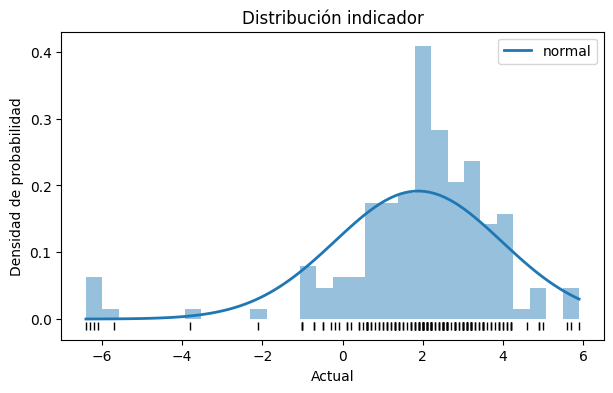

In [11]:
m.gpe4

La distribución de la serie de tiempo del indicador no es normal pues en la prueba de Shapiro el p-value que se obtiene no supera 0.05 por lo que se tiene que no es normal. Aparte se observa en la grafica de la distribución que en efecto no se cumple del todo con una distribución normal, se tiene la media aproximadamente en 2 y hay mayor desviacion hacia la izquierda.

#### Estacionariedad

In [12]:
m.pe3

,Indice,Valores
0,ADF Statistic,-3.587152
1,p-value,0.006011


Para determinar si hay o no estacionariedad se realizó una prueba Duckey-Fuller. Esta es una prueba de raíz única que detecta estadísticamente la presencia de conducta tendencial estocástica en las series temporales de las variables mediante un contraste de hipótesis. En este caso los resultados que se obtuvieron (el p-value es menor a 0.05) determino que no hay estacionariedad en el modelo.

#### Estacionalidad

In [13]:
m.gpe3

Se puede determinar en base a la gráfica anterior que no hay estacionalidad, los datos de la serie son aleatorios y varian de año en año.

#### Detección de Atípicos

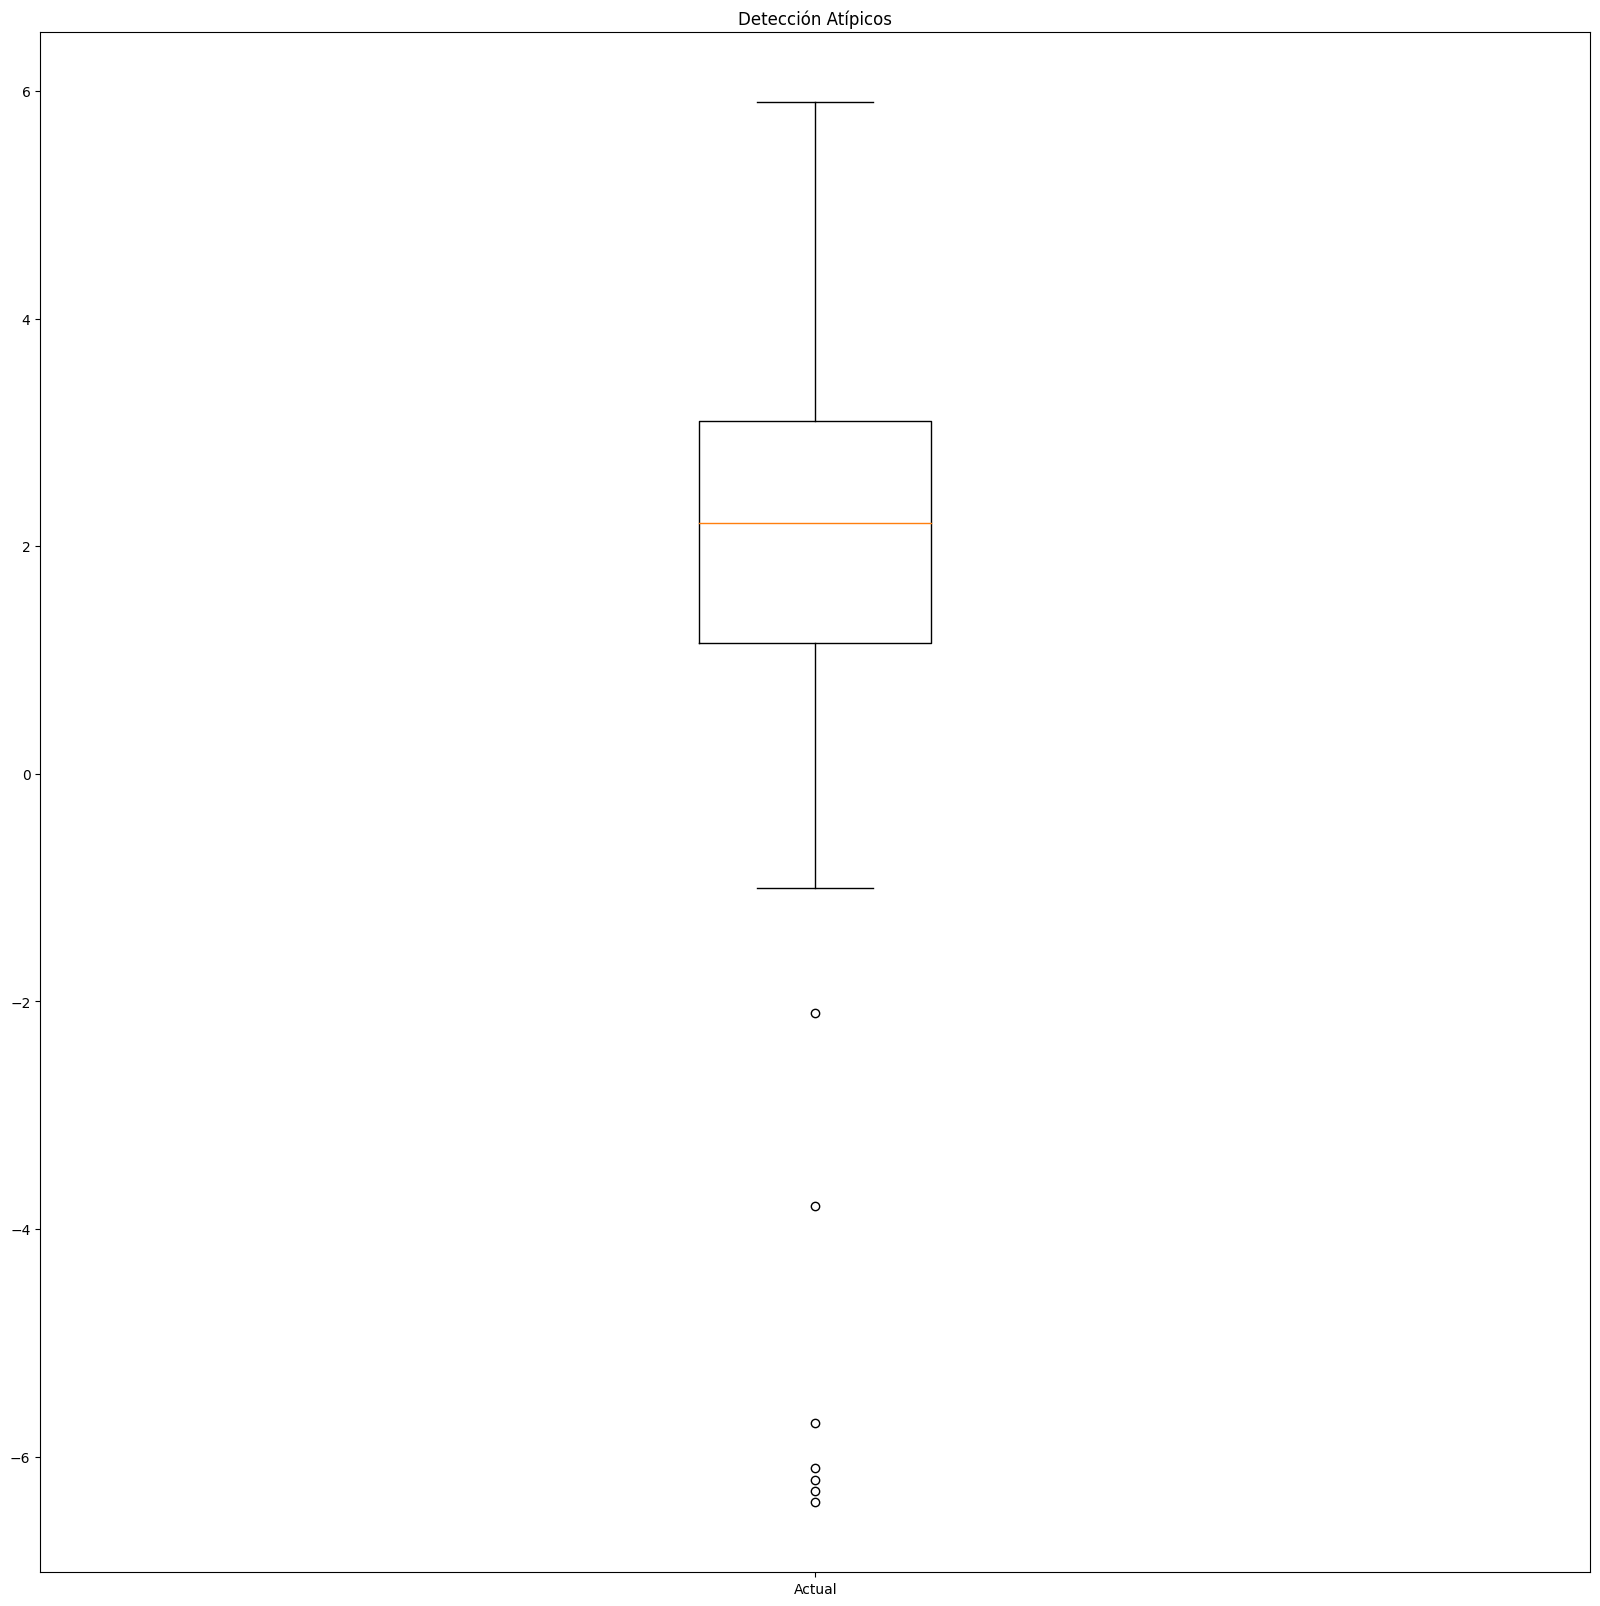

In [14]:
m.gpe5

Se puede apreciar en la gráfica de caja y bigotes que si hay valores atipicos en la serie de tiempo que estan por debajo de 1 y llegan hasta -6

### Aspectos Computacionales

Precios historicos del USDJPY con granularidad de 1 minuto

In [15]:
ohlc=m.ohlc
ohlc.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,2020-01-10 06:00:00,109.524,109.534,109.524,109.529,1476,13,221400000
1,2020-01-10 06:01:00,109.529,109.534,109.528,109.534,819,13,122850000
2,2020-01-10 06:02:00,109.534,109.534,109.527,109.529,1056,13,158400000
3,2020-01-10 06:03:00,109.529,109.529,109.524,109.526,594,13,89100000
4,2020-01-10 06:04:00,109.526,109.527,109.523,109.527,753,13,112950000


In [16]:
m.metricas.reset_index().drop(['index'], axis=1)

,Dirección,Pips Alcistas,Pips Bajistas,Volatilidad,Escenario
0,0.082,14.8,0.8,24.3,A
1,0.006,0.7,1.7,3.7,B
2,0.100,12.0,0.0,13.0,C
3,-0.010,5.0,2.0,14.0,D


# <font color= #6B6B6B> 4. Definición de sistema de trading  </font>

<hr style="border:0.02in solid gray"> </hr>

-Aspectos Financieros: Despues de analizar diferentes momentos en el tiempo del ohlc del USDJPY en el momento que se presentaba el indicador Gross Domestic Product Annualized - United States se concluyo que en los escenarios A, B y C el precio viene disminuyendo previo al indicador y despues del indicador esta tendencia bajista no solo prevalece si no que se incrementa. En el escenario D sucede lo contrario, el precio previo al indicador aumenta y despues del indicador el aumento es aun mayor. Por ende en los escenarios A, B y C se opta por vender y en el escenario D se vende.

-Aspectos Estadisticos: Después de realizar las diferentes pruebas de econometria se vio que lo que se vio en las validaciones graficas de Aspectos Financieros se mantendrian son validas pues en la serie de tiempo no se presenta informacion de que la serie de tiempo varie mucho.

-Aspectos Computacionales: Para los escenarios A, B y C se ejecutara opcion de venta. Mientras que para el escenario D se ejecutara opción de compra. Esto porque en el calculo de las metricas para cada escenario se vio que la dirección señalaba la ejecución de estas ordenes.

Entonces el sistema de trading en base al indicador Gross Domestic Product Annualized - United States queda de la siguiente manera.

| Escenario|   Opcion|
|:---------|:--------|
|A         | Venta   |
|B         | Venta   |
|C         | Venta   |
|D         | Compra  |

# <font color= #6B6B6B> 5. Optimizacion y Backtest de sistema de trading  </font>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 6. Rentabilidad  </font>

<hr style="border:0.02in solid gray"> </hr>